# SVM Scikit + LBPH Scikit

## 1. | Import Library

In [1]:
# 1. Pustaka Dasar
import os  # Operasi sistem dan manajemen file
import numpy as np  # Operasi array dan komputasi numerik

# 2. Pustaka Pengolahan Citra
import cv2  # OpenCV untuk deteksi dan pemrosesan gambar
from skimage.feature import local_binary_pattern  # Ekstraksi fitur tekstur

# 3. Pustaka Machine Learning
from sklearn.model_selection import train_test_split  # Pembagian dataset
from sklearn.svm import SVC  # Support Vector Classification
from sklearn.metrics import DistanceMetric  # Perhitungan metrik jarak

# 4. Pustaka Visualisasi
import matplotlib.pyplot as plt  # Visualisasi data dan hasil



## 2. | Persiapan dataset

### 2.1 | Load Dataset

In [2]:
# Fungsi untuk menampilkan sampel gambar dari satu kelas dataset
def show_dataset(images_class, label):
    """
    Menampilkan 5 sampel gambar dari kelas yang dipilih
    Args:
        images_class: array gambar dari satu kelas
        label: nama kelas/label yang ditampilkan
    """
    # Mengatur ukuran figure/plot (14x5 inci)
    plt.figure(figsize=(14,5))
    k = 0
    
    # Loop untuk membuat 5 subplot
    for i in range(1,6):
        # Membuat subplot dengan layout 1 baris, 5 kolom
        plt.subplot(1,5,i)
        
        try:
            # Mencoba menampilkan gambar berwarna (BGR ke RGB)
            plt.imshow(images_class[k][:,:,::-1])
        except:
            # Jika gagal, tampilkan sebagai gambar grayscale
            plt.imshow(images_class[k], cmap='gray')
            
        # Mengatur judul, menghilangkan axis, dan layout
        plt.title(label)
        plt.axis('off')
        plt.tight_layout()
        
        k += 1  # Increment indeks gambar
    
    # Tampilkan plot
    plt.show()

In [3]:
# Lokasi folder dataset
dataset_folder = "dataset/"

# Inisialisasi list untuk menyimpan nama dan gambar
names = []    # List untuk menyimpan label/nama kelas
images = []   # List untuk menyimpan gambar wajah

# Loop melalui setiap folder dalam dataset
for folder in os.listdir(dataset_folder):
    # Loop untuk setiap file gambar dalam folder (dibatasi 70 gambar per kelas)
    for name in os.listdir(os.path.join(dataset_folder, folder))[:70]:
        # Cek apakah file berekstensi .jpg
        if name.find(".jpg") > -1:
            # Baca gambar menggunakan OpenCV
            img = cv2.imread(os.path.join(dataset_folder + folder, name))
            
            # Tambahkan gambar dan labelnya ke dalam list
            images.append(img)           # Simpan gambar
            names.append(folder)         # Simpan nama folder sebagai label

In [4]:
labels = np.unique(names)

labels

array(['Colin_Powell', 'Donald_Rumsfeld', 'George_W_Bush',
       'Gerhard_Schroeder', 'Tony_Blair'], dtype='<U17')

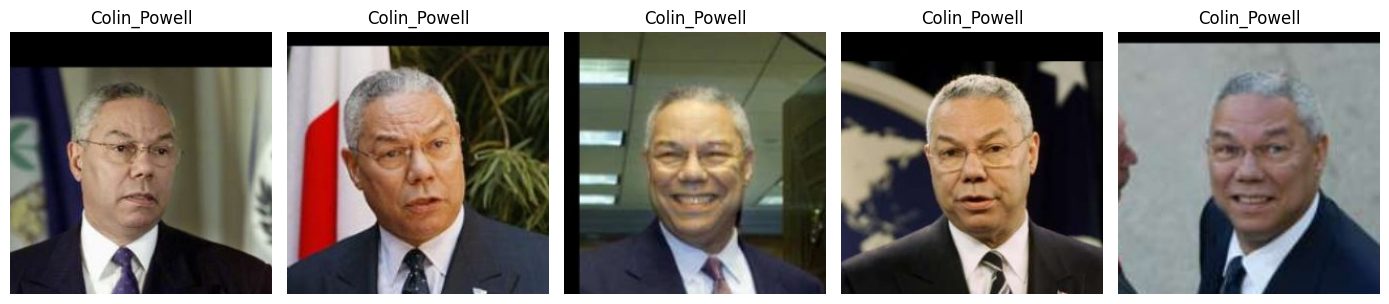

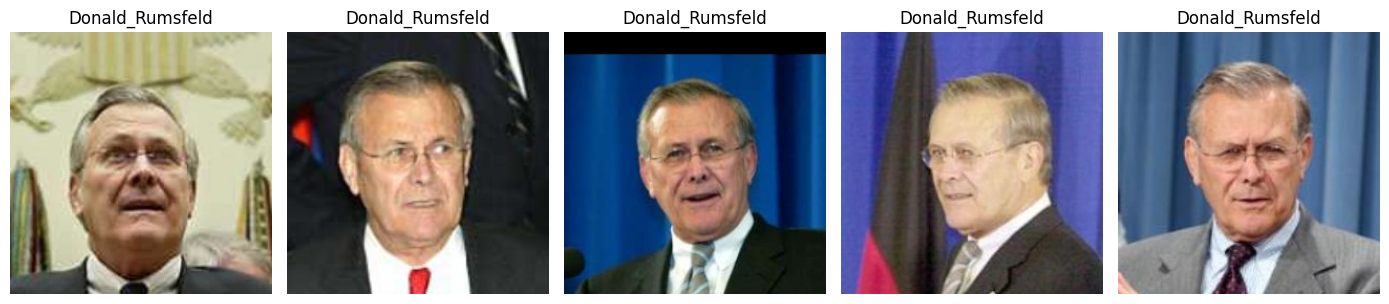

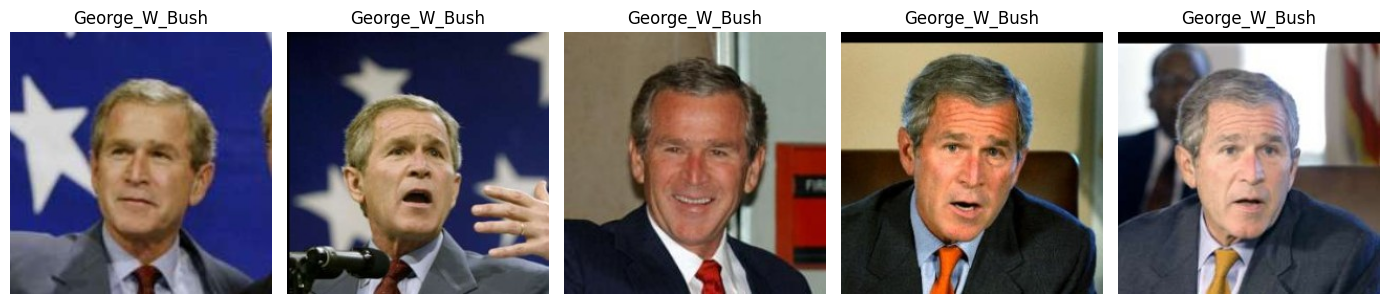

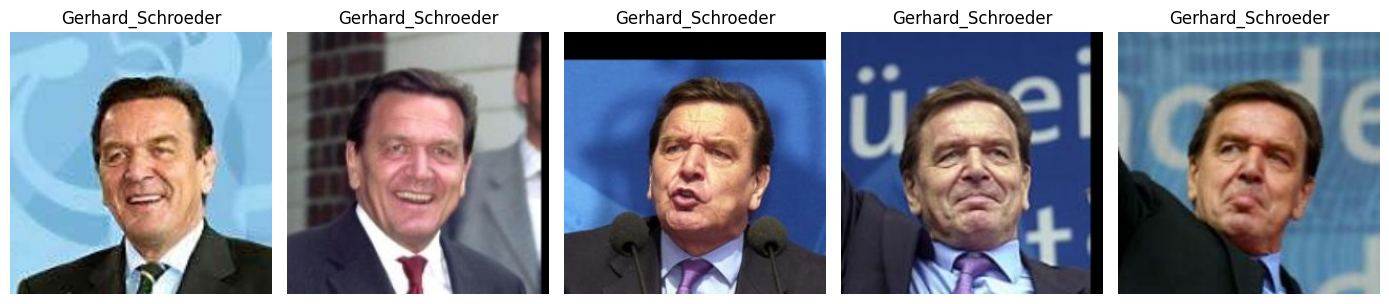

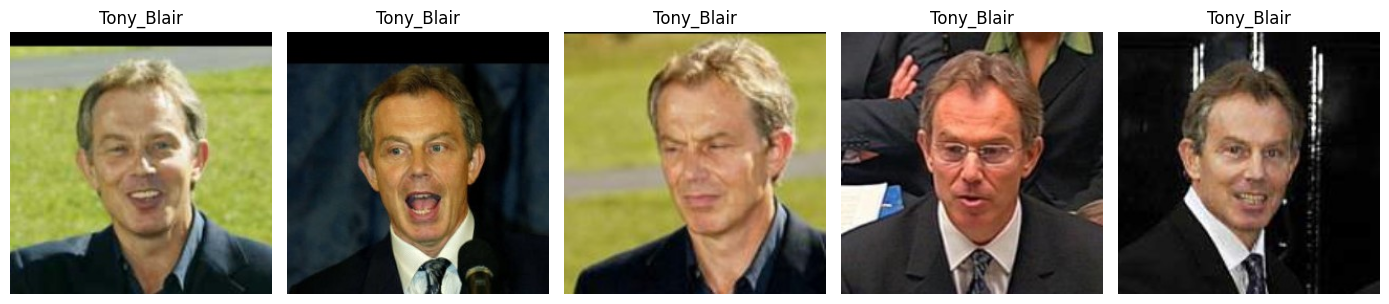

In [5]:
for label in labels:
    
    ids = np.where(label== np.array(names))[0]
    images_class = images[ids[0] : ids[-1] + 1]
    show_dataset(images_class, label)

## 3. | Preprocessing

### 3.1 | Crop, resize dan connvert ke grayscale

In [6]:
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_default.xml')

In [7]:
def detect_face(img, idx):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(img, 1.3, 5)
    try :
        x, y, w, h = faces[0]

        img = img[y:y+h, x:x+w] 
        img = cv2.resize(img, (100, 100))
    except :
        print("Face not found in image index", i)
        img = None
    return img

In [8]:
croped_images = []
for i, img in enumerate(images) :
    img = detect_face(img, i)
    if img is not None :
        croped_images.append(img)
    else :
        del names[i]

Face not found in image index 68
Face not found in image index 172


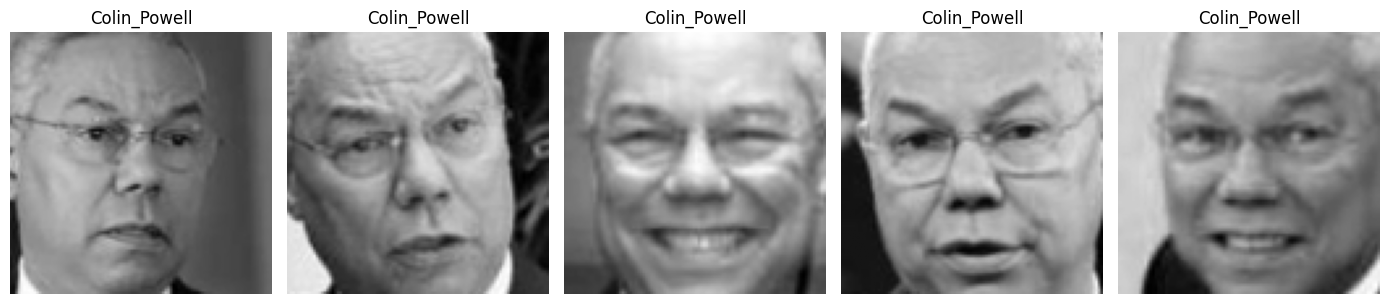

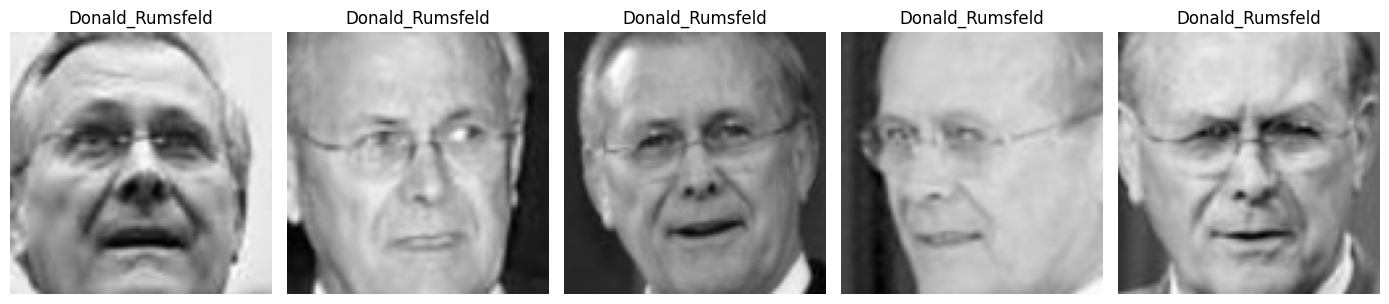

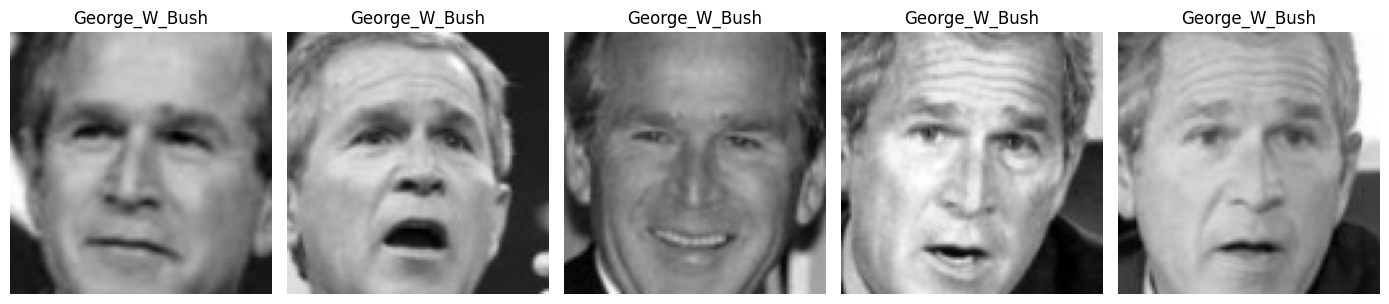

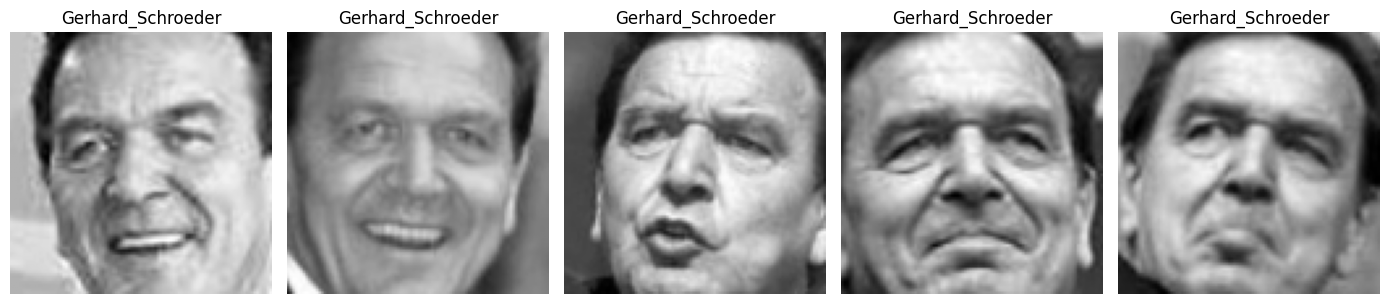

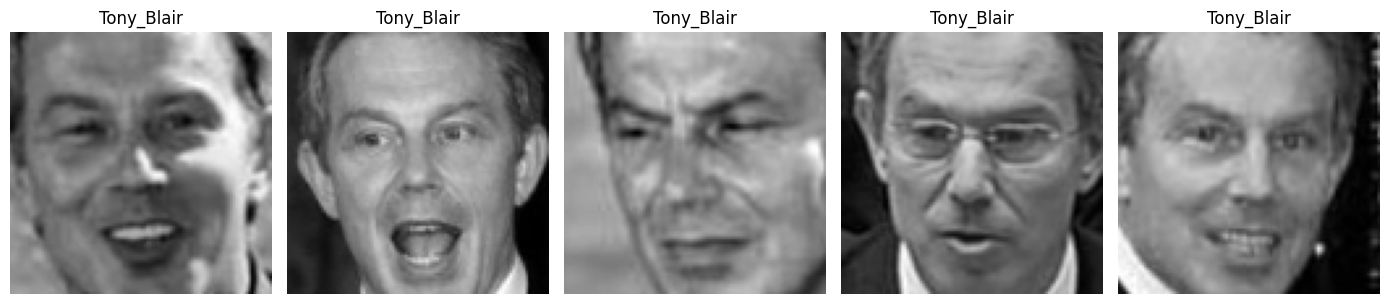

In [9]:
for label in labels:
    
    ids = np.where(label== np.array(names))[0]
    images_class = croped_images[ids[0] : ids[-1] + 1] # select croped images for each class
    show_dataset(images_class, label)

### 3.2 | Label encoding

In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
le = LabelEncoder()

le.fit(names)

print(le.classes_)

['Colin_Powell' 'Donald_Rumsfeld' 'George_W_Bush' 'Gerhard_Schroeder'
 'Tony_Blair']


In [12]:
name_vec = le.transform(names)

In [13]:
print(name_vec)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4]


### 3.3 Split dataset (75% train, 25% test)

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x_train, x_test, y_train, y_test = train_test_split(np.array(croped_images, dtype=np.float32),   # input data
                                                    np.array(name_vec),                            # target/output data 
                                                    test_size=0.25, 
                                                    random_state=42)

In [16]:
print(x_train.shape, y_train.shape, x_test.shape,  y_test.shape)

(261, 100, 100) (261,) (87, 100, 100) (87,)


### Find LBP Histograms for each image data using Scikit-Image

In [17]:
from skimage.feature import local_binary_pattern

In [18]:
P = 8
R = 1
img = x_train[0]
lbp_img = local_binary_pattern(img, P=P, R=R, method="default")

d:\project\SVM_face detector\SVM_face_detector\lib\site-packages\skimage\feature\texture.py:385: UserWarning: Applying `local_binary_pattern` to floating-point images may give unexpected results when small numerical differences between adjacent pixels are present. It is recommended to use this function with images of integer dtype.
  warnings.warn(


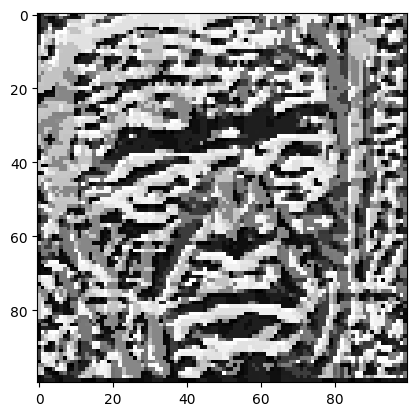

In [19]:
plt.imshow(lbp_img, cmap="gray")

In [20]:
H = np.histogram(lbp_img.ravel(),                          
                 bins=2**P,                          
                 range=(0, 2**P),
                 density=True)[0] 

In [21]:
print(H)

[0.0182 0.0124 0.     0.0086 0.01   0.0021 0.0052 0.0316 0.0009 0.0001
 0.     0.     0.0064 0.0005 0.008  0.0408 0.0133 0.0033 0.0001 0.0011
 0.0008 0.0001 0.0008 0.0012 0.0074 0.0008 0.     0.0001 0.0253 0.001
 0.0384 0.0267 0.0006 0.0001 0.0001 0.0002 0.0002 0.     0.0002 0.0002
 0.     0.     0.     0.     0.     0.     0.0001 0.0003 0.0054 0.0009
 0.     0.     0.0004 0.     0.0006 0.0007 0.011  0.0008 0.     0.0005
 0.0351 0.0001 0.0142 0.0074 0.0105 0.0013 0.0002 0.0006 0.003  0.0001
 0.0008 0.0016 0.0001 0.     0.     0.     0.0007 0.0001 0.0004 0.0007
 0.0012 0.0002 0.     0.     0.0001 0.     0.0004 0.     0.0006 0.
 0.     0.     0.0011 0.     0.0002 0.0002 0.0049 0.0007 0.     0.0002
 0.0004 0.     0.0003 0.0008 0.     0.     0.     0.     0.0004 0.
 0.0003 0.0004 0.0234 0.0013 0.0002 0.0008 0.0013 0.     0.     0.0008
 0.0451 0.0003 0.0003 0.0004 0.027  0.0002 0.0105 0.0027 0.0005 0.0064
 0.     0.0133 0.     0.0008 0.     0.0603 0.     0.0001 0.     0.
 0.0001 0.0002 0.00

<function matplotlib.pyplot.show(close=None, block=None)>

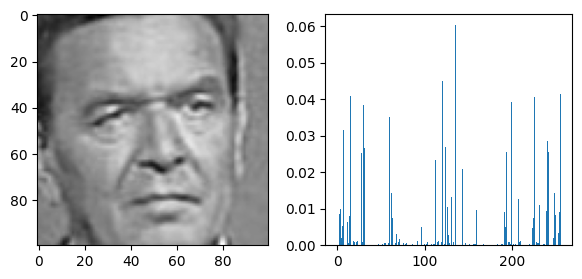

In [22]:
plt.figure(figsize=(7,3))
plt.subplot(1,2,1)
plt.imshow(img, cmap="gray")

plt.subplot(1,2,2)
axis = np.arange(len(H))
plt.bar(axis, H)

plt.show

## Pembuatan Model

### SVM + LBPH

In [23]:
class LBPH_SVM_Recognizer_V2():
    #
    # ----- class for LBPH Scikit + SVM Scikit------
    #
    def __init__(self, C=100, Gamma=0.001):
        self.svm = SVC(kernel='precomputed', C=C, gamma=Gamma)
        self.chi2 = DistanceMetric.get_metric('pyfunc', func=self.chi2_distance)
        self.face_histograms = []
        self.hist_mat = []
        
    def chi2_distance(self, hist1, hist2, gamma=0.5): 
        chi = - gamma * np.sum(((hist1 - hist2) ** 2) / (hist1 + hist2 + 1e-7)) 
        return chi

    def find_lbp_histogram(self, image, P=8, R=1, eps=1e-7, n_window=(8,8)):
        E = []
        h, w = image.shape
        h_sz = int(np.floor(h/n_window[0]))
        w_sz = int(np.floor(w/n_window[1]))
        lbp_img = local_binary_pattern(image, P=P, R=R, method="default")
        for (x, y, C) in self.sliding_window(lbp_img, stride=(h_sz, w_sz), window=(h_sz, w_sz)):
            if C.shape[0] != h_sz or C.shape[1] != w_sz:
                continue
            H = np.histogram(C,                          
                             bins=2**P, 
                             range=(0, 2**P),
                             density=True)[0] 
            
            H = H.astype("float")
            H /= (H.sum() + eps)
            E.extend(H)
        return E
    
    def sliding_window(self, image, stride, window):
        for y in range(0, image.shape[0], stride[0]):
            for x in range(0, image.shape[1], stride[1]):
                yield (x, y, image[y:y + window[1], x:x + window[0]])
                   
    def train(self, x, y):
        self.face_histograms = [self.find_lbp_histogram(img) for img in x]
        self.hist_mat = np.array(self.face_histograms, dtype=np.float32)
        K = self.chi2.pairwise(self.hist_mat,self.hist_mat)
        self.svm.fit(K, y)
    
    def predict(self, x):
        hists = [self.find_lbp_histogram(img) for img in x]
        hist_mat = np.array(hists, dtype=np.float32)
        K = self.chi2.pairwise(hist_mat, self.hist_mat)
        idx = self.svm.predict(K)

        return idx, None

In [24]:
lbph_svm_model_v2 = LBPH_SVM_Recognizer_V2()

In [25]:
lbph_svm_model_v2.train(x_train, y_train)

### Save & load Model

In [26]:
! pip install pickle-mixin


[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [27]:
import pickle

def save_model(model, filename, path=""): 
    with open(os.path.join(path, filename), 'wb') as out_name:
        pickle.dump(model, out_name, pickle.HIGHEST_PROTOCOL)

def read_model(filename, path=""):
    with open(os.path.join(path, filename), 'rb') as in_name:
        model = pickle.load(in_name)
        return model

In [28]:
save_model(lbph_svm_model_v2, "lbph_svm_model_v2.pkl", path="")

In [29]:
lbph_svm_model_v2 = read_model("lbph_svm_model_v2.pkl", path="")

### predict all test data

In [30]:
y_predict = lbph_svm_model_v2.predict(x_test)[0]

d:\project\SVM_face detector\SVM_face_detector\lib\site-packages\skimage\feature\texture.py:385: UserWarning: Applying `local_binary_pattern` to floating-point images may give unexpected results when small numerical differences between adjacent pixels are present. It is recommended to use this function with images of integer dtype.
  warnings.warn(


### Summary

In [31]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [32]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.figure(figsize=(6, 6))
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

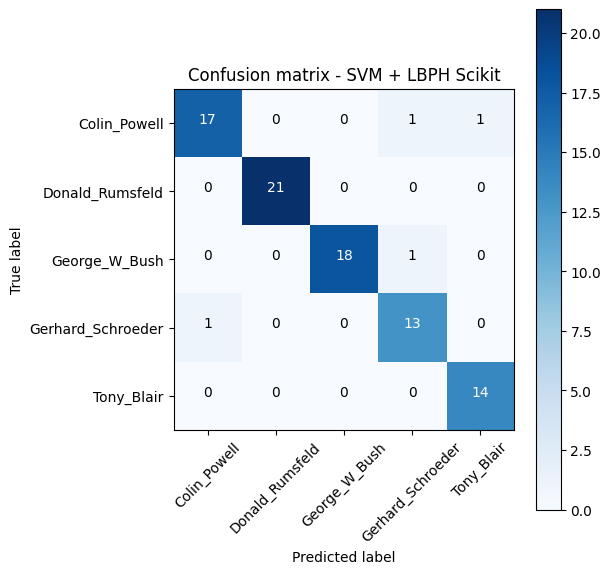

In [33]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_predict)
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plot_confusion_matrix(cnf_matrix, classes=labels, normalize=False,
                      title='Confusion matrix - SVM + LBPH Scikit')

In [34]:
print("== Classification Report for - LBPH Custom ==\n")
print(classification_report(y_test, 
                            y_predict, 
                            target_names=labels))

== Classification Report for - LBPH Custom ==

                   precision    recall  f1-score   support

     Colin_Powell       0.94      0.89      0.92        19
  Donald_Rumsfeld       1.00      1.00      1.00        21
    George_W_Bush       1.00      0.95      0.97        19
Gerhard_Schroeder       0.87      0.93      0.90        14
       Tony_Blair       0.93      1.00      0.97        14

         accuracy                           0.95        87
        macro avg       0.95      0.95      0.95        87
     weighted avg       0.96      0.95      0.95        87



### Apply our face dataset

* colect data

In [35]:
# cap = cv2.VideoCapture(0)

# my_name = "Aqsal"
# i = 0
# while cap.isOpened():
#     ret, frame = cap.read()
    
#     if ret :
#         cv2.imshow("Capture Photo", frame)
#         cv2.imwrite("my_face/%s_%04d.jpg" %  (my_name, i), frame)
        
#         if cv2.waitKey(100) == ord('q') or i == 71:
#             break
#         i += 1    
# cap.release()
# cv2.destroyAllWindows()

In [36]:
# ! Dir dataset\

In [37]:
# ! mkdir dataset\Aqsal

In [38]:
# ! move my_face\* dataset\Aqsal

Rerun Load dataset, Traing & Test Model

### test realtime video

In [39]:
def draw_ped(img, label, x0, y0, xt, yt, color=(255,127,0), text_color=(255,255,255)):
    (w, h), baseline = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, 0.5, 1)
    cv2.rectangle(img,
                  (x0, y0 + baseline),  
                  (max(xt, x0 + w), yt), 
                  color, 
                  2)
    cv2.rectangle(img,
                  (x0, y0 - h),  
                  (x0 + w, y0 + baseline), 
                  color, 
                  -1)  
    cv2.putText(img, 
                label, 
                (x0, y0),                   
                cv2.FONT_HERSHEY_SIMPLEX,     
                0.5,                          
                text_color,                
                1,
                cv2.LINE_AA) 
    return img


In [40]:
import pickle
import os

def read_model(filename, path=""):
    full_path = path + filename
    if not os.path.exists(full_path):
        print(f"ERROR: Model file {full_path} tidak ditemukan!")
        return None
    try:
        with open(full_path, 'rb') as f:
            model = pickle.load(f)
        print(f"Model berhasil dimuat: {type(model)}")
        return model
    except Exception as e:
        print(f"ERROR loading model: {str(e)}")
        return None

In [41]:
# Definisikan labels berdasarkan nama folder di dataset
dataset_folder = "dataset/"
labels = sorted(os.listdir(dataset_folder))
print(f"Daftar labels: {labels}")

Daftar labels: ['Colin_Powell', 'Donald_Rumsfeld', 'George_W_Bush', 'Gerhard_Schroeder', 'Tony_Blair']


In [42]:
# Load Haar cascade
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_default.xml')
if face_cascade.empty():
    print("ERROR: Haar cascade tidak dimuat dengan benar!")

# Muat model dan label
model = read_model("lbph_svm_model_v2.pkl", path="")
#labels = read_labels("labels.pkl", path="")  # Ganti dengan nama file label Anda

if model is None:
    print("FATAL: Model tidak dapat dimuat! Pastikan file model ada dan valid.")
    exit()

if not labels:
    print("WARNING: Label tidak ditemukan atau kosong. Indexing bisa gagal.")
    labels = ["Unknown"]  # fallback jika label kosong

print("Model berhasil dimuat dan siap digunakan.")

# Buka kamera
cap = cv2.VideoCapture(0)
if not cap.isOpened():
    print("ERROR: Tidak dapat membuka kamera!")
    exit()

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        print("ERROR: Gagal membaca frame dari kamera.")
        break

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.1, 5)

    for (x, y, w, h) in faces:
        try:
            face_img = gray[y:y+h, x:x+w]
            face_img = cv2.resize(face_img, (100, 100))

            # Prediksi wajah
            try:
                prediction = model.predict([face_img])

                # Ekstrak idx dan confidence
                if isinstance(prediction, tuple) and len(prediction) == 2:
                    idx, confidence = prediction
                else:
                    idx = prediction[0] if isinstance(prediction, (list, np.ndarray)) else prediction
                    confidence = 100.0  # default confidence

                # Pastikan idx adalah integer scalar
                if isinstance(idx, (np.ndarray, list)):
                    idx = int(idx[0])
                elif isinstance(idx, (np.generic,)):
                    idx = int(idx)
                else:q
                    idx = int(idx)

            except Exception as e:
                print(f"Error saat prediksi: {e}")
                idx, confidence = 0, 0

            # Cek indeks valid untuk label
            if idx >= len(labels) or idx < 0:
                print(f"WARNING: idx={idx} tidak valid, menggunakan fallback.")
                idx = 0

            label_text = "%s (%.2f%%)" % (labels[idx], confidence) if confidence is not None else labels[idx]
            frame = draw_ped(frame, label_text, x, y, x + w, y + h, color=(0, 255, 255), text_color=(50, 50, 50))

        except Exception as e:
            print(f"Error saat memproses wajah: {e}")
            continue

    # Tampilkan hasil
    cv2.imshow('Detect Face', frame)

    # Tombol keluar
    if cv2.waitKey(10) == ord('q'):
        break

# Bersihkan
cap.release()
cv2.destroyAllWindows()

Model berhasil dimuat: <class '__main__.LBPH_SVM_Recognizer_V2'>
Model berhasil dimuat dan siap digunakan.
